In [14]:
import pandas as pd
df = pd.read_csv('data.csv', 
                 names=['time', 'low', 'high', 'open', 'close', 'volume', 'tw_sentiment', 'tw_followers', 'reddit_sentiment']
                )
df.head()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
0,1519997640,10969.0,10969.01,10969.01,10969.00,0.111542,0.195409,607130.0,0.113258
1,1519997700,10969.0,10969.00,10969.00,10969.00,0.504804,0.195409,607131.0,0.113258
2,1519997760,10965.0,10965.01,10965.00,10965.01,0.622844,0.195409,607135.0,0.113258
3,1519997820,10965.0,10965.00,10965.00,10965.00,0.036500,0.195408,607140.0,0.113258
4,1519997880,10964.8,10964.81,10964.81,10964.80,0.762078,0.195451,607349.0,0.113258


In [15]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
count,4.538000e+03,4538.000000,4538.000000,4538.000000,4538.000000,4538.000000,4538.000000,4.538000e+03,4538.000000
mean,1.520134e+09,11279.686723,11281.786289,11280.693986,11280.791871,1.390539,0.049176,1.127658e+06,0.120428
std,7.860861e+04,192.711703,192.369058,192.541707,192.536917,1.951635,0.038062,3.404051e+05,0.034918
min,1.519998e+09,10765.000000,10786.810000,10785.010000,10782.000000,0.000111,-0.012135,4.487650e+05,0.022938
25%,1.520066e+09,11150.290000,11155.002500,11151.235000,11151.920000,0.270361,0.021676,8.948908e+05,0.102270
50%,1.520134e+09,11310.535000,11313.505000,11311.495000,11311.650000,0.780777,0.042585,1.041822e+06,0.128306
75%,1.520202e+09,11441.757500,11445.000000,11443.370000,11443.437500,1.778655,0.073290,1.207219e+06,0.152811
max,1.520270e+09,11597.770000,11599.000000,11597.780000,11597.780000,39.877601,0.195451,2.272463e+06,0.176271


In [16]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
time,1.000000,0.677210,0.676411,0.676664,0.676792,-0.105620,-0.364386,0.330484,-0.589929
low,0.677210,1.000000,0.999594,0.999765,0.999823,-0.027157,0.019385,0.270065,-0.315563
high,0.676411,0.999594,1.000000,0.999805,0.999796,-0.016895,0.019180,0.269869,-0.314725
open,0.676664,0.999765,0.999805,1.000000,0.999623,-0.022782,0.019450,0.269702,-0.315048
close,0.676792,0.999823,0.999796,0.999623,1.000000,-0.020995,0.019319,0.270187,-0.315165
volume,-0.105620,-0.027157,-0.016895,-0.022782,-0.020995,1.000000,0.066934,0.041367,-0.014726
tw_sentiment,-0.364386,0.019385,0.019180,0.019450,0.019319,0.066934,1.000000,-0.345422,0.281330
tw_followers,0.330484,0.270065,0.269869,0.269702,0.270187,0.041367,-0.345422,1.000000,-0.467910
reddit_sentiment,-0.589929,-0.315563,-0.314725,-0.315048,-0.315165,-0.014726,0.281330,-0.467910,1.000000


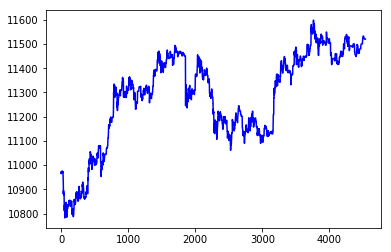

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df['close'], 'b')

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [19]:
X = df[['open', 'reddit_sentiment', 'tw_sentiment', 'tw_followers']]
y = df['close'].values.reshape(-1, 1)

In [20]:
scalerX = MinMaxScaler(feature_range=(0, 1))
scalerY = MinMaxScaler(feature_range=(0, 1))
X_scale = scalerX.fit_transform(X)
y_scale = scalerY.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size=0.3, shuffle=False)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape

(3176, 1, 4)

In [23]:
np.random.seed(42)

model = Sequential()

model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(LSTM(200, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('linear'))
model.summary()

model.compile(loss='mae', optimizer='adam', metrics=['mse', 'mae'])
history = model.fit(X_train, y_train, batch_size=X_train.shape[0], 
          epochs=150, validation_data=(X_test, y_test), shuffle=False, verbose=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 200)            164000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 485,001
Trainable params: 485,001
Non-trainable params: 0
_________________________________________________________________


([<matplotlib.lines.Line2D at 0x11da4c9e8>], 'g')

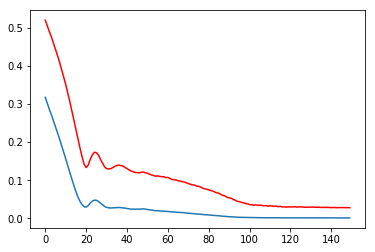

In [24]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error']), 'g'

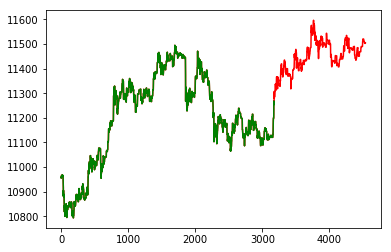

In [25]:
y_predict_train = model.predict(X_train)
y_predict_train = scalerY.inverse_transform(y_predict_train)

y_predict_test = model.predict(X_test)
y_predict_test = scalerY.inverse_transform(y_predict_test)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_predict_train, y_predict_test), axis=0)

plt.plot(y, 'r')
plt.plot(y_predict_train, 'g')

In [26]:
import time
from enum import Enum

class Order(Enum):
    STAY = 1
    DOWN = 2
    UP = 3

n_error = 0
y_predict_last = y_last = None
for index, row in df.iterrows():
    if y_predict_last is None:
        y_predict_last = y_last = row['open']
        
    x_predict = np.array([row['open'], row['reddit_sentiment'], row['tw_sentiment'], row['tw_followers']]).reshape(1, -1)
    x_predict = scalerX.transform(x_predict)
    x_predict_reshaped = np.reshape(x_predict, (1, 1, 4))
    y_predict_r = model.predict(x_predict_reshaped)
    y_predict_r_rescaled = scalerY.inverse_transform(y_predict_r)

    predict_order = real_order = Order.DOWN
    if y_predict_last < y_predict_r_rescaled:
        predict_order = Order.UP
    elif y_predict_last == y_predict_r_rescaled:
        predict_order = Order.STAY

    if y_last < row['open']:
        real_order = Order.UP
    elif y_last == row['open']:
        real_order = Order.STAY
    
    y_predict_last = y_predict_r_rescaled
    y_last = row['open']
    
    if real_order != predict_order:
        #print('predicted %s, real %s'% (predict_order, real_order))
        n_error = n_error + 1
        
count = df['open'].count()
percent = (n_error / count) * 100
print("Error Order percentage: %0.2f%%" % percent)

Error Order percentage: 7.84%
